# Tugas-1

In [1]:
import pandas as pd
import math

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/ZuniAmandaDewi/dataset/main/tested.csv")

In [ ]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### **Menghitung Nominal/Kategorikal**

$$ d(i,j) = \frac {p-m}{p}$$

ket :
*   p = jumlah data yang dibandingkan
*   m = jumlah data yang sama




In [ ]:
data[["Pclass","Embarked"]].head(5)

,Pclass,Embarked
0,3,Q
1,3,S
2,2,Q
3,3,S
4,3,S


In [ ]:
def d1(i,j):
    P = 2
    M = 0
    for col in ["Pclass","Embarked"]:
        if data[col][i] == data[col][j]:
            M += 1
    return (P-M)/P

In [ ]:
d1(0,1)

0.5

In [ ]:
d1(2,3)

1.0

In [ ]:
d1(3,4)

0.0

### **Menghitung Biner Simetris**


$$ d(i,j) =  \frac {r+s}{q+r+s+t}$$

ket:

*   r = i=1 : j=0
*   s = i=0 : j=1
*   q = i=1 : j=1
*   t = i=0 : j=0





In [ ]:
data[["Survived","Sex"]].head(5)

,Survived,Sex
0,0,male
1,1,female
2,0,male
3,0,male
4,1,female


In [ ]:
masukan1 = "male"
masukan2 = "female"

value1 = 1
value2 = 0

def perubahan (sex):
    return value1 if sex == masukan1 else value2

In [ ]:
data["Sex"] = data["Sex"].apply(perubahan)

In [ ]:
data[["Survived","Sex"]].head(5)

,Survived,Sex
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0


In [ ]:
def d2(i,j):
    q = 0
    r = 0
    s = 0
    t = 0
    for col in ["Survived","Sex"]:
        if data[col][i] == 1 and data[col][j] == 1:
            q += 1
        elif data[col][i] == 1 and data[col][j] == 0: 
            r += 1
        elif data[col][i] == 0 and data[col][j] == 1:
            s += 1
        else:
            t += 1
    return (r+s)/(q+r+s+t)

In [ ]:
d2(0,1)

1.0

In [ ]:
d2(2,3)

0.0

In [ ]:
d2(3,4)

1.0

### **Menghitung Biner Asimetris**


$$ d(i,j)= \frac {r+s}{q+r+s}$$

ket:
*   r = i=1 : j=0
*   s = i=0 : j=1
*   q = i=1 : j=1


In [ ]:
def d3(i,j):
    q = 0
    r = 0
    s = 0
    for col in ["Survived","Sex"]:
        if data[col][i] == 1 and data[col][j] == 1:
            q += 1
        elif data[col][i] == 1 and data[col][j] == 0: 
            r += 1
        elif data[col][i] == 0 and data[col][j] == 1:
            s += 1
    return (r+s)/(q+r+s)

In [ ]:
d3(0,1)

1.0

In [ ]:
d3(2,3)

0.0

In [ ]:
d3(3,4)

1.0

## **Menghitung Numerik**

$$ d(i,j) = \sqrt{{(Xa1-Xb1)^2}+{(Xa2-Xb2)^2}}$$

In [ ]:
data[["Ticket","Fare"]].head(5)

,Ticket,Fare
0,330911,7.8292
1,363272,7.0000
2,240276,9.6875
3,315154,8.6625
4,3101298,12.2875


In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,0.636364,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,0.481622,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,0.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,1.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,1.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200


**Standar Deviasi**
$$Rumus:$$$$z=\frac{x-μ}{𝔡}$$

In [ ]:
#Normalisasi Pclass
std1 = 0.841838
mean1 = 2.265550
for col1 in ["Pclass"]:
    value1 = data[col1]
    hasil1 = (value1-mean1)/std1
    print(hasil1)

# Normalisasi Fare
std2 = 55.907576
mean2 = 35.627188
for col2 in ["Fare"]:
    value2 = data[col2]
    hasil2 = (value2-mean2)/std2
    print(hasil2)

0      0.872436
1      0.872436
2     -0.315441
3      0.872436
4      0.872436
         ...   
413    0.872436
414   -1.503318
415    0.872436
416    0.872436
417    0.872436
Name: Pclass, Length: 418, dtype: float64
0     -0.497213
1     -0.512045
2     -0.463974
3     -0.482308
4     -0.417469
         ...   
413   -0.493264
414    1.310606
415   -0.507573
416   -0.493264
417   -0.237336
Name: Fare, Length: 418, dtype: float64


In [ ]:
def d4(i,j,h):
    result = 0
    for col in [hasil1, hasil2]:
        result = math.pow(abs(col[i] - col[j]), h)
    return result**(1/h)

In [ ]:
d4(0,1,2)

0.014831621388843641

In [ ]:
d4(2,3,2)

0.018333830105601412

In [ ]:
d4(3,4,2)

0.06483915525151723

##**Dissimiliarity**

In [ ]:
dTotal1 = d1(0,1) + d2(0,1) + d3(0,1) + d4(0,1,2)
dTotal2 = d1(2,3) + d2(2,3) + d3(2,3) + d4(2,3,2)
dTotal3 = d1(3,4) + d2(3,4) + d3(3,4) + d4(3,4,2)
print("Total 1 :",dTotal1)
print("Total 2 :",dTotal2)
print("Total 3 :",dTotal3)

Total 1 : 2.5148316213888435
Total 2 : 1.0183338301056013
Total 3 : 2.064839155251517


# Tugas-2
## Diskritisasi

In [ ]:
nilai2 = pd.read_csv("https://raw.githubusercontent.com/ZuniAmandaDewi/dataset/main/Iris.csv")

In [ ]:
nilai2

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
nilai2[["SepalLengthCm"]].head(5)

,SepalLengthCm
0,5.1
1,4.9
2,4.7
3,4.6
4,5.0


In [ ]:
nilai2.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### **menghitung Rentang**

$$ w = \frac {max-min}{k}$$

ket:


*   K = jenis kategori yang digunakan




In [ ]:
def iris(min, max):
  k = 4
  w = (max - min)/k
  return (w)

In [ ]:
iris(4.3,7.9)

0.9000000000000001

### **Jarak Rentang**
$$(min + i * w)$$

\begin{align}
{min + i * w}
\end {align)

In [ ]:

def rentang(i):
  min = 4.3
  v = min + i * iris(4.3,7.9)
  return (v)

In [ ]:
rentang(1)

5.2

In [ ]:
rentang(2)

6.1

In [ ]:
rentang(3)

7.0

In [ ]:
rentang(4)

7.9

In [ ]:
for col in ["SepalLengthCm"]: 
  nilai = nilai2[col]
  def equal(nilai):
    if nilai >= 4.3 and nilai < 5.2:
      return "A"
    elif nilai >= 5.2 and nilai < 6.1:
      return "B"
    elif nilai >= 6.1 and nilai < 7.0:
      return "C"
    elif nilai >= 7.0 and nilai < 7.9:
      return "D"

In [ ]:
nilai2["SepalLengthCm"] = nilai.apply(equal) 

In [ ]:
nilai2[["SepalLengthCm"]].head(150)

,SepalLengthCm
0,A
1,A
2,A
3,A
4,A
...,...
145,C
146,C
147,C
148,C


In [ ]:
nilai2

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,A,3.5,1.4,0.2,Iris-setosa
1,2,A,3.0,1.4,0.2,Iris-setosa
2,3,A,3.2,1.3,0.2,Iris-setosa
3,4,A,3.1,1.5,0.2,Iris-setosa
4,5,A,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,C,3.0,5.2,2.3,Iris-virginica
146,147,C,2.5,5.0,1.9,Iris-virginica
147,148,C,3.0,5.2,2.0,Iris-virginica
148,149,C,3.4,5.4,2.3,Iris-virginica


# Tugas-3
## K-Nearest Neighbor (KNN)

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()

In [ ]:
type(iris)

sklearn.utils.Bunch

In [ ]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [ ]:
print(type(iris.data))
print(type(iris.target))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
print(iris.data.shape)

(150, 4)


In [ ]:
X = iris.data
y = iris.target

In [ ]:
print(X.shape)
print(y.shape)


(150, 4)
(150,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


In [ ]:
print(y_train.shape)
print(y_test.shape)

(120,)
(30,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics

k_range = range(1,26)
scores = {}
scores_list = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,y_train)
  y_pred = knn.predict(X_test)
  scores[k] = metrics.accuracy_score(y_test,y_pred)
  scores_list.append(metrics.accuracy_score(y_test,y_pred))

Text(0, 0.5, 'Testing Accuracy')

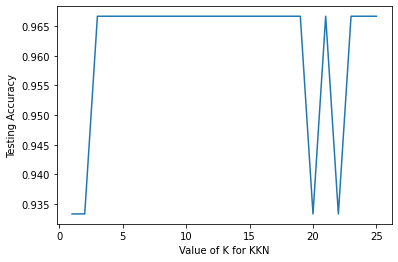

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

#plot the relationship between K and the testing accuracy
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KKN')
plt.ylabel('Testing Accuracy')

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X,y)

KNeighborsClassifier()

In [ ]:
classes = {0:'setosa',1:'versicolor',2:'virginica'}

x_new = [[3,4,5,2],[5,4,2,2]]
y_predict = knn.predict(x_new)

print(classes[y_predict[0]])
print(classes[y_predict[1]])

versicolor
setosa


# Tugas 4
## Menghitung Naive Bayes

$$P(xⅈ|𝑦ⅈ)=\frac{1}{\sqrt2πδ^2}^e-\frac{(xi.μj)^2}{2δ^2j}$$

---


$$δ=\sqrt\frac{Σ(xi-μ)^2}{N}$$

---

$$μ=\frac{Σᴺᵢ=1}{N}$$

---
$$P(x|c)P(c)$$


ket:
1.   P(x | Setosa) = cari semua standar deviasinya dan kalikan semua standar deviasinya
2.   P(Setosa) = Jumlah semua data sejenis : jumlah semua data
3. P= P(x | setosa) * P(Setosa)




In [ ]:
import numpy as np

In [ ]:
nilai2

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
# Memisahkan dataset dalam variabel independen dan dependen
X = nilai2.iloc[:,:4].values
y = nilai2['Species'].values

In [ ]:
# Memisahkan dataset menjadi Training set dan Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 82)

In [ ]:
# Fitur Scaling untuk membawa variabel dalam satu skala
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Memasang Klasifikasi Naive Bayes ke set Pelatihan dengan kernel linier
from sklearn.naive_bayes import GaussianNB
nvclassifier = GaussianNB()
nvclassifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Memprediksi hasil set Tes
y_pred = nvclassifier.predict(X_test)
print(y_pred)

['Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor']


In [ ]:
# melihat nilai aktual dan prediksi berdampingan
y_compare = np.vstack((y_test,y_pred)).T
# nilai aktual di sisi kiri dan nilai prediksi di sisi kanan
# mencetak 5 nilai teratas
y_compare[:5,:]

array([['Iris-virginica', 'Iris-virginica'],
       ['Iris-virginica', 'Iris-virginica'],
       ['Iris-setosa', 'Iris-setosa'],
       ['Iris-setosa', 'Iris-setosa'],
       ['Iris-setosa', 'Iris-setosa']], dtype=object)

In [ ]:
# Membuat Matriks confusion
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[11  0  0]
 [ 0  9  0]
 [ 0  0 10]]


In [ ]:
# menemukan akurasi dari matriks confusion
a = cm.shape
corrPred = 0
falsePred = 0

for row in range(a[0]):
    for c in range(a[1]):
        if row == c:
            corrPred +=cm[row,c]
        else:
            falsePred += cm[row,c]
print('Correct predictions: ', corrPred)
print('False predictions', falsePred)
print ('\n\nAccuracy of the Naive Bayes Clasification is: ', corrPred/(cm.sum()))      

Correct predictions:  30
False predictions 0


Accuracy of the Naive Bayes Clasification is:  1.0


# Tugas 5
## K-Means Clustering

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [ ]:
x = nilai2.iloc[:, [0, 1, 2, 3]].values
x

array([[  1. ,   5.1,   3.5,   1.4],
       [  2. ,   4.9,   3. ,   1.4],
       [  3. ,   4.7,   3.2,   1.3],
       [  4. ,   4.6,   3.1,   1.5],
       [  5. ,   5. ,   3.6,   1.4],
       [  6. ,   5.4,   3.9,   1.7],
       [  7. ,   4.6,   3.4,   1.4],
       [  8. ,   5. ,   3.4,   1.5],
       [  9. ,   4.4,   2.9,   1.4],
       [ 10. ,   4.9,   3.1,   1.5],
       [ 11. ,   5.4,   3.7,   1.5],
       [ 12. ,   4.8,   3.4,   1.6],
       [ 13. ,   4.8,   3. ,   1.4],
       [ 14. ,   4.3,   3. ,   1.1],
       [ 15. ,   5.8,   4. ,   1.2],
       [ 16. ,   5.7,   4.4,   1.5],
       [ 17. ,   5.4,   3.9,   1.3],
       [ 18. ,   5.1,   3.5,   1.4],
       [ 19. ,   5.7,   3.8,   1.7],
       [ 20. ,   5.1,   3.8,   1.5],
       [ 21. ,   5.4,   3.4,   1.7],
       [ 22. ,   5.1,   3.7,   1.5],
       [ 23. ,   4.6,   3.6,   1. ],
       [ 24. ,   5.1,   3.3,   1.7],
       [ 25. ,   4.8,   3.4,   1.9],
       [ 26. ,   5. ,   3. ,   1.6],
       [ 27. ,   5. ,   3.4,   1.6],
 

In [ ]:
nilai2.info()
nilai2[0:10]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
#distribusi frekuensi spesies"
iris_outcome = pd.crosstab(index=nilai2["Species"],  # Buat tab silang
                              columns="count")      # Name the count column

iris_outcome

col_0,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [ ]:
iris_setosa=nilai2.loc[nilai2["Species"]=="Iris-setosa"]
iris_virginica=nilai2.loc[nilai2["Species"]=="Iris-virginica"]
iris_versicolor=nilai2.loc[nilai2["Species"]=="Iris-versicolor"]

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated

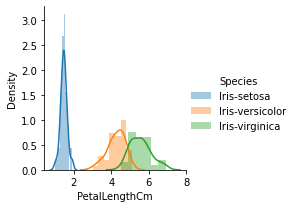

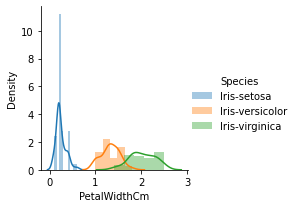

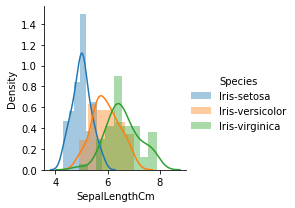

In [ ]:
sns.FacetGrid(nilai2,hue="Species",size=3).map(sns.distplot,"PetalLengthCm").add_legend()
sns.FacetGrid(nilai2,hue="Species",size=3).map(sns.distplot,"PetalWidthCm").add_legend()
sns.FacetGrid(nilai2,hue="Species",size=3).map(sns.distplot,"SepalLengthCm").add_legend()
plt.show()

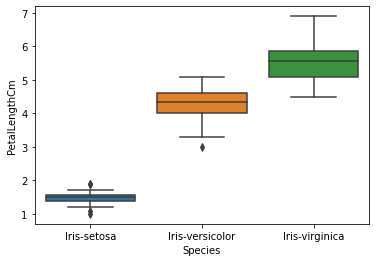

In [ ]:
sns.boxplot(x="Species",y="PetalLengthCm",data=nilai2)
plt.show()

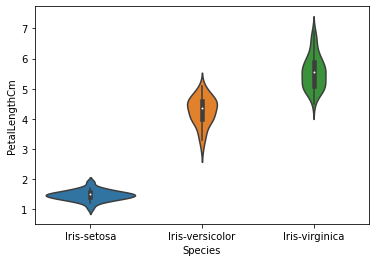

In [ ]:
sns.violinplot(x="Species",y="PetalLengthCm",data=nilai2)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


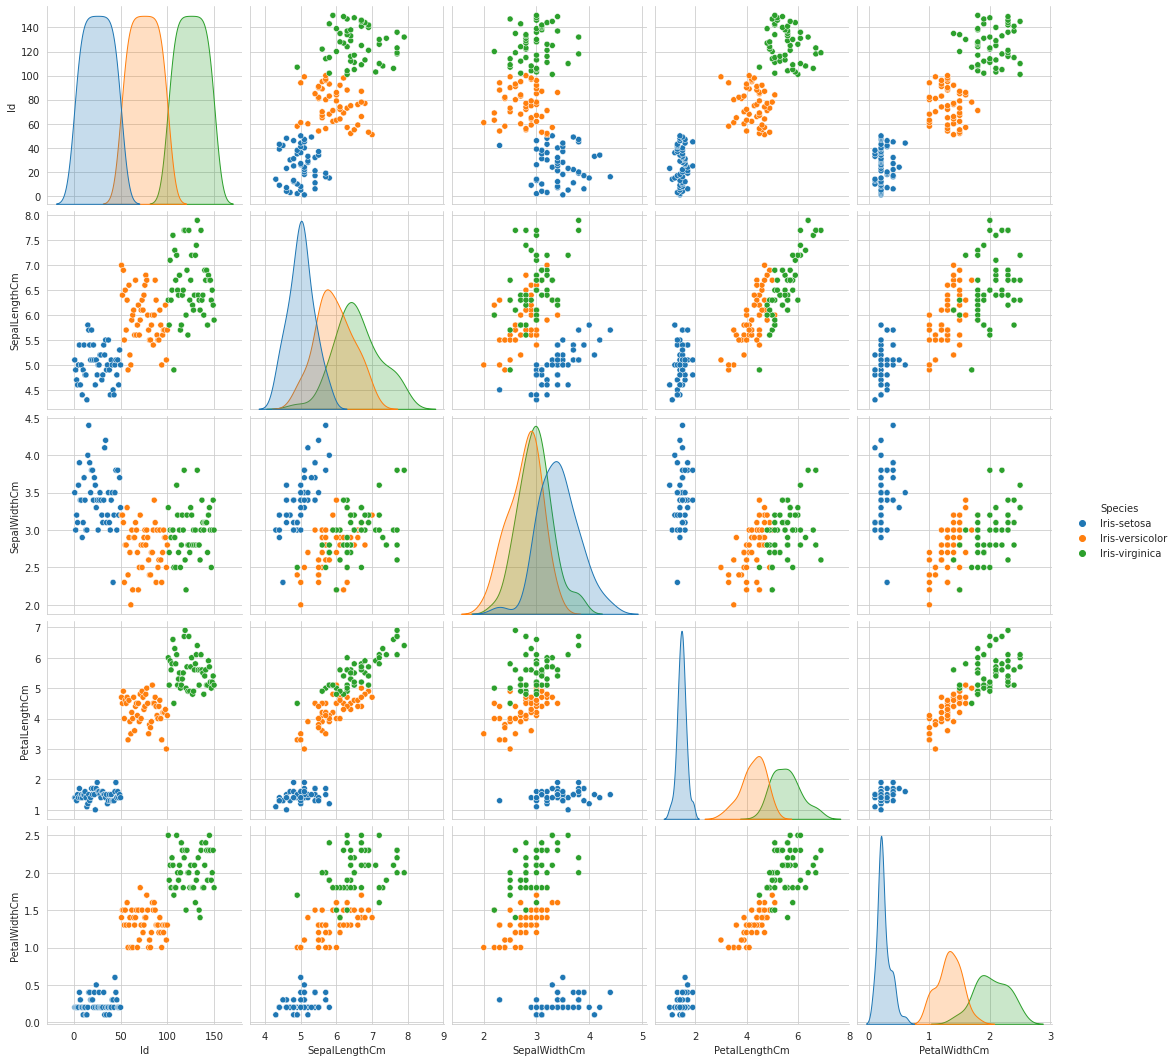

In [ ]:
sns.set_style("whitegrid")
sns.pairplot(nilai2,hue="Species",size=3);
plt.show()

In [ ]:
# Menemukan jumlah cluster yang optimal untuk klasifikasi k-means
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

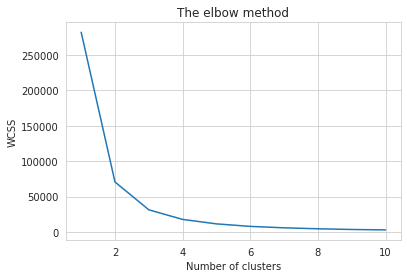

In [ ]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # dalam cluster jumlah kuadrat
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

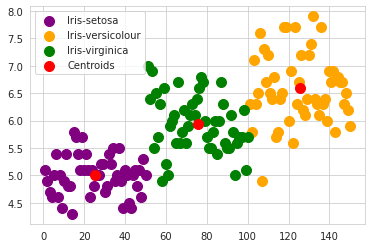

In [ ]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

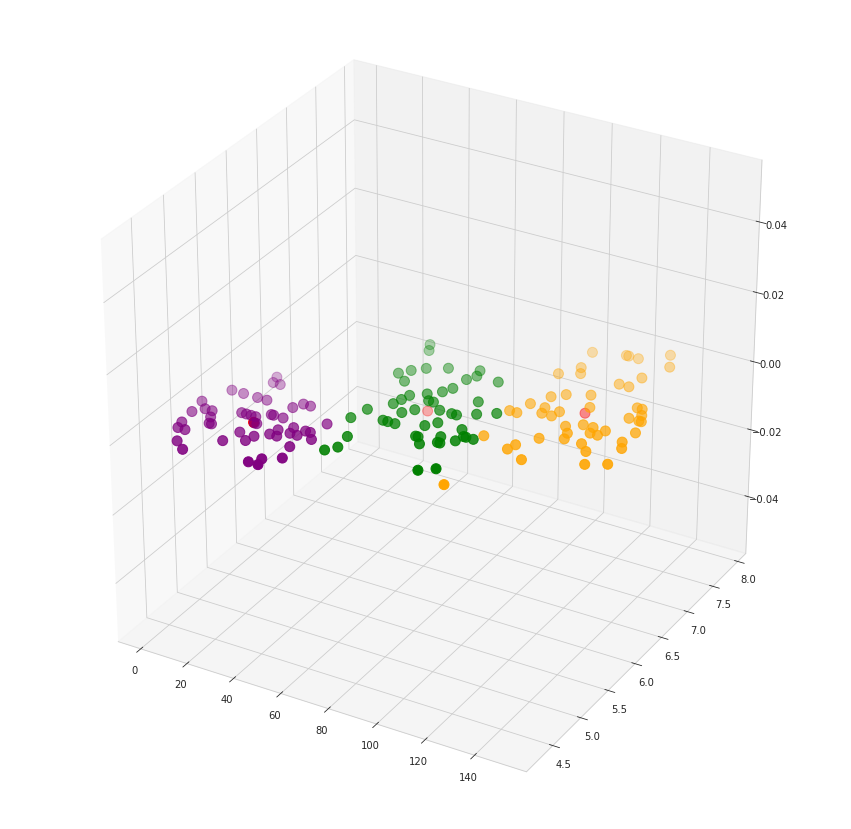

In [ ]:
# 3d scatterplot using matplotlib

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.show()

# Tugas 6
Decesion Tree

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
nilai2.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
#mengetahui jumlah data setiap  class
nilai2.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

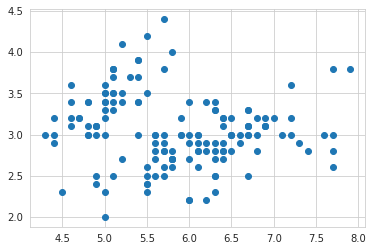

In [ ]:
#Memvisualisasikan fitur kumpulan data untuk menemukan pola untuk menyelesaikan tugas

plt.scatter(nilai2['SepalLengthCm'],nilai2['SepalWidthCm'])
plt.show()

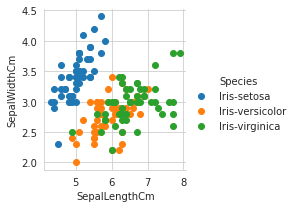

In [ ]:
#Menggunakan Seaborn lib untuk memvisualisasikan 2 fitur berdasarkan variabel target.

sns.set_style('whitegrid')
sns.FacetGrid(nilai2, hue = 'Species') \
   .map(plt.scatter, 'SepalLengthCm','SepalWidthCm') \
   .add_legend()

plt.show()

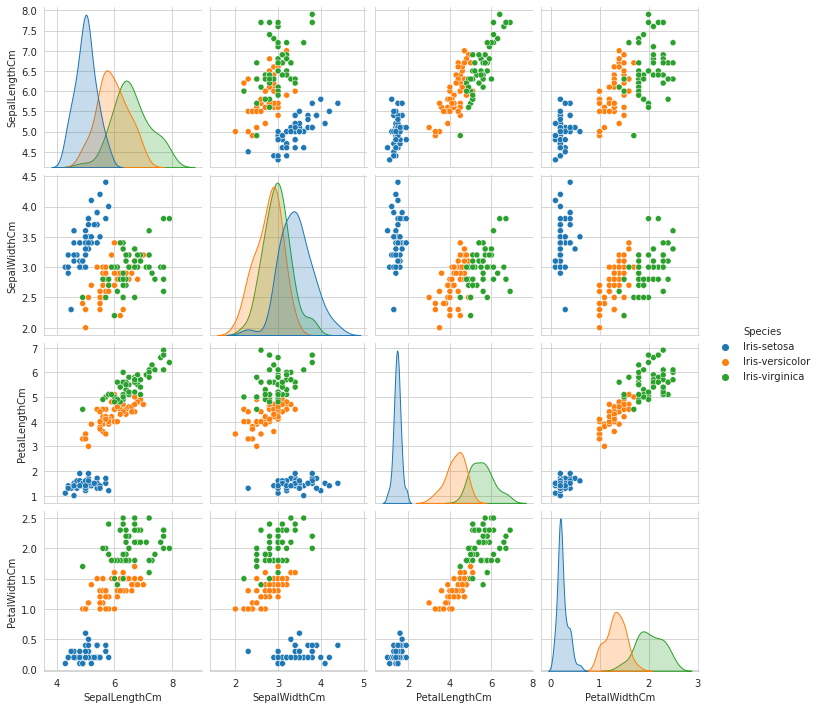

In [ ]:
#Plot pasangan memberikan hubungan b/w semua fitur distribusi satu sama lain..

sns.pairplot(nilai2.drop(['Id'],axis=1), hue='Species')
plt.show()

In [ ]:
#Hanya mencoba menjelajahi beberapa fitur baru menggunakan data yang diberikan...

nilai2['Sepal_diff'] = nilai2['SepalLengthCm']-nilai2['SepalWidthCm']
nilai2['petal_diff'] = nilai2['PetalLengthCm']-nilai2['PetalWidthCm']
nilai2

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Sepal_diff,petal_diff
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1.6,1.2
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1.9,1.2
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1.5,1.1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1.5,1.3
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1.4,1.2
...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,3.7,2.9
146,147,6.3,2.5,5.0,1.9,Iris-virginica,3.8,3.1
147,148,6.5,3.0,5.2,2.0,Iris-virginica,3.5,3.2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2.8,3.1


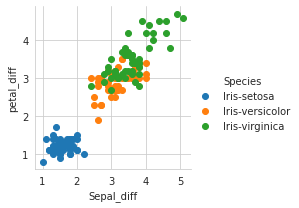

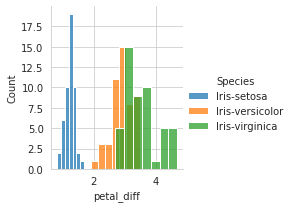

In [ ]:
#Menganalisis fitur baru untuk mendapatkan lebih banyak informasi selain dari yang sudah ada...

sns.set_style('whitegrid')
sns.FacetGrid(nilai2,hue='Species')\
   .map(plt.scatter,'Sepal_diff','petal_diff')\
   .add_legend()
plt.show()    


sns.set_style('whitegrid')
sns.FacetGrid(nilai2,hue='Species')\
   .map(sns.histplot,'petal_diff')\
   .add_legend()
plt.show()    

In [ ]:
nilai2['Sepal_petal_len_diff'] = nilai2['SepalLengthCm']-nilai2['PetalLengthCm']
nilai2['Sepal_petal_width_diff'] = nilai2['SepalWidthCm']-nilai2['PetalWidthCm']
nilai2

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Sepal_diff,petal_diff,Sepal_petal_len_diff,Sepal_petal_width_diff
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1.6,1.2,3.7,3.3
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1.9,1.2,3.5,2.8
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1.5,1.1,3.4,3.0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1.5,1.3,3.1,2.9
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1.4,1.2,3.6,3.4
...,...,...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,3.7,2.9,1.5,0.7
146,147,6.3,2.5,5.0,1.9,Iris-virginica,3.8,3.1,1.3,0.6
147,148,6.5,3.0,5.2,2.0,Iris-virginica,3.5,3.2,1.3,1.0
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2.8,3.1,0.8,1.1


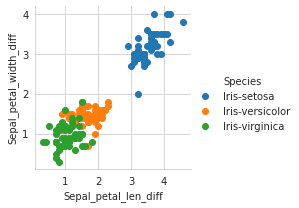

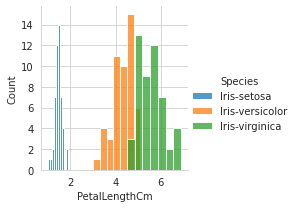

In [ ]:
sns.set_style('whitegrid')
sns.FacetGrid(nilai2,hue='Species')\
   .map(plt.scatter,'Sepal_petal_len_diff','Sepal_petal_width_diff')\
   .add_legend()
plt.show()

sns.set_style('whitegrid')
sns.FacetGrid(nilai2,hue='Species')\
   .map(sns.histplot,'PetalLengthCm')\
   .add_legend()
plt.show()

In [ ]:
nilai2['Sepal_petal_len_wid_diff'] = nilai2['SepalLengthCm']-nilai2['PetalWidthCm']
nilai2['Sepal_petal_wid_len_diff'] = nilai2['SepalWidthCm']-nilai2['PetalLengthCm']
nilai2

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Sepal_diff,petal_diff,Sepal_petal_len_diff,Sepal_petal_width_diff,Sepal_petal_len_wid_diff,Sepal_petal_wid_len_diff
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1.6,1.2,3.7,3.3,4.9,2.1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1.9,1.2,3.5,2.8,4.7,1.6
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1.5,1.1,3.4,3.0,4.5,1.9
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1.5,1.3,3.1,2.9,4.4,1.6
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1.4,1.2,3.6,3.4,4.8,2.2
...,...,...,...,...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,3.7,2.9,1.5,0.7,4.4,-2.2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,3.8,3.1,1.3,0.6,4.4,-2.5
147,148,6.5,3.0,5.2,2.0,Iris-virginica,3.5,3.2,1.3,1.0,4.5,-2.2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2.8,3.1,0.8,1.1,3.9,-2.0


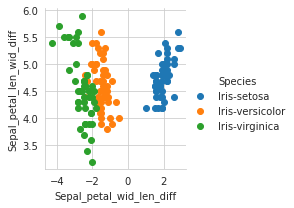

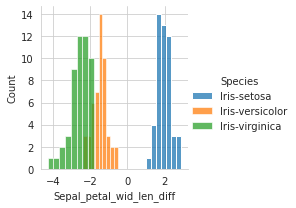

In [ ]:
sns.set_style('whitegrid')
sns.FacetGrid(nilai2,hue='Species')\
   .map(plt.scatter,'Sepal_petal_wid_len_diff','Sepal_petal_len_wid_diff')\
   .add_legend()
plt.show()

sns.set_style('whitegrid')
sns.FacetGrid(nilai2,hue='Species')\
   .map(sns.histplot,'Sepal_petal_wid_len_diff')\
   .add_legend()
plt.show()

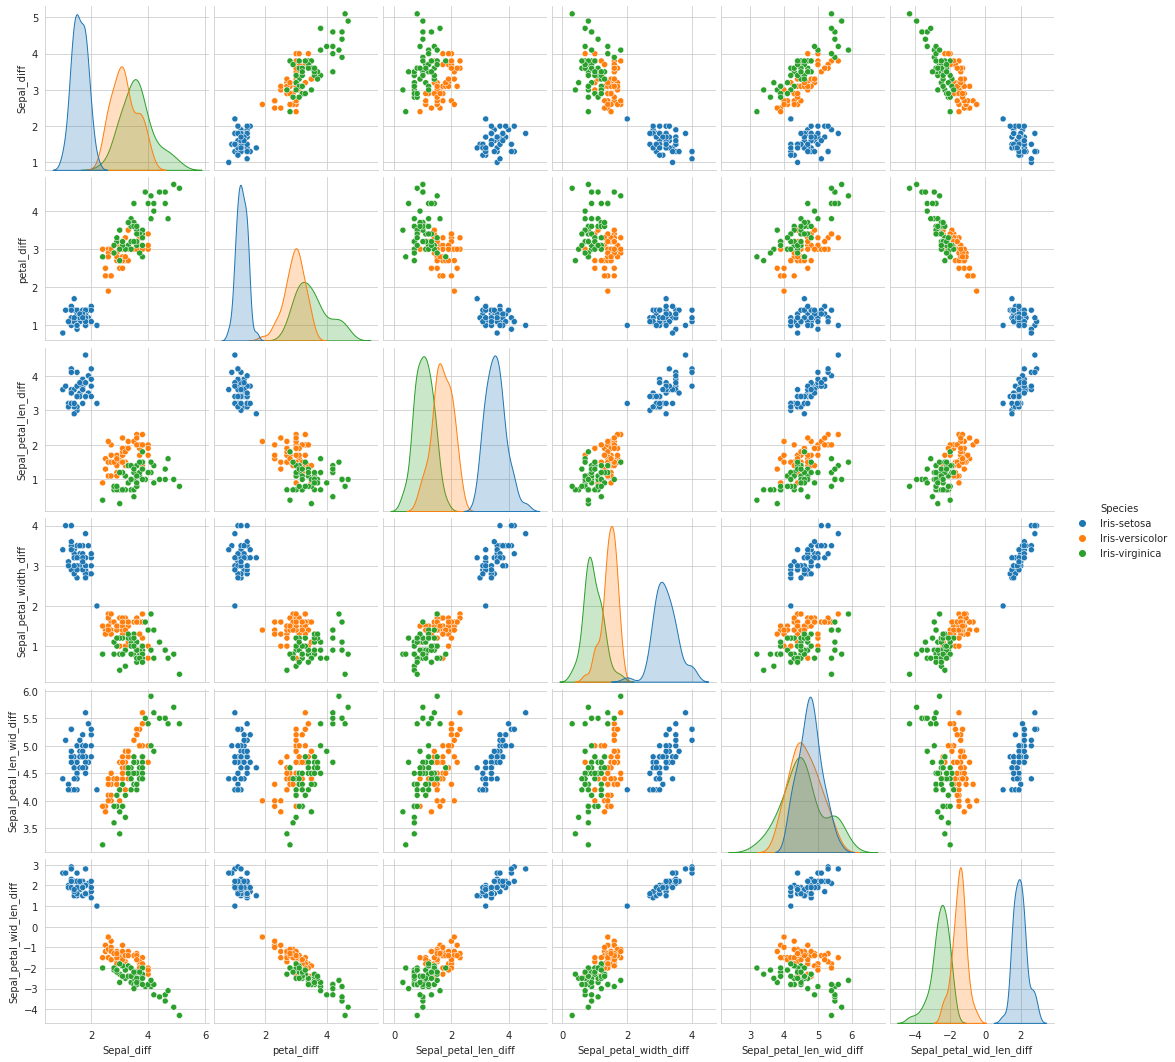

In [ ]:
# Menemukan hubungan b/w fitur baru berdasarkan label kelas...

sns.pairplot(nilai2[['Species', 'Sepal_diff', 'petal_diff', 'Sepal_petal_len_diff',\
       'Sepal_petal_width_diff', 'Sepal_petal_len_wid_diff',\
       'Sepal_petal_wid_len_diff']], hue='Species')
plt.show()

In [ ]:
#Menjatuhkan kolom Id karena tidak ada gunanya dalam mengklasifikasikan label kelas ..
nilai2.drop(['Id'],axis=1,inplace=True)

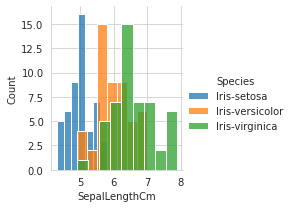

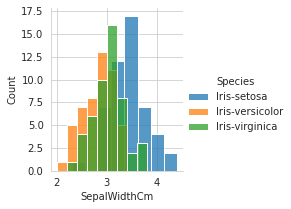

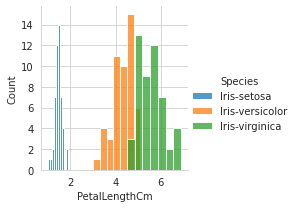

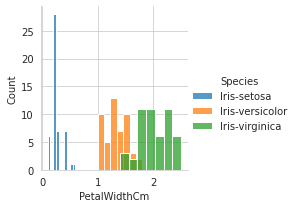

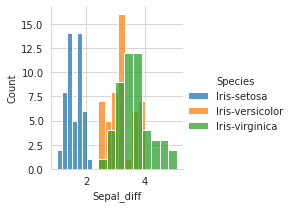

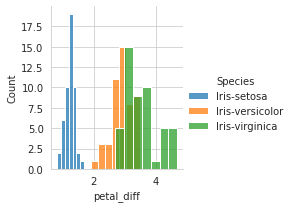

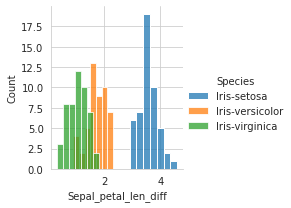

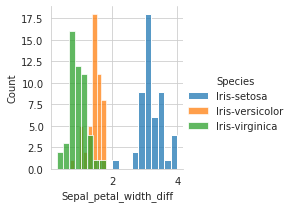

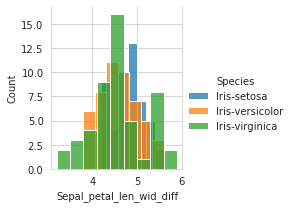

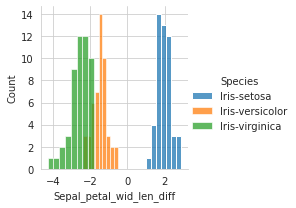

In [ ]:
#menjelajahi plot distribusi untuk semua fitur

for i in nilai2.columns:
    if i == 'Species':
        continue
    sns.set_style('whitegrid')
    sns.FacetGrid(nilai2,hue='Species')\
    .map(sns.histplot,i)\
    .add_legend()
    plt.show()

[Text(0.45454545454545453, 0.9166666666666666, 'X[3] <= 0.8\ngini = 0.665\nsamples = 94\nvalue = [30, 30, 34]'),
 Text(0.36363636363636365, 0.75, 'gini = 0.0\nsamples = 30\nvalue = [30, 0, 0]'),
 Text(0.5454545454545454, 0.75, 'X[4] <= -1.9\ngini = 0.498\nsamples = 64\nvalue = [0, 30, 34]'),
 Text(0.36363636363636365, 0.5833333333333334, 'X[3] <= 1.75\ngini = 0.153\nsamples = 36\nvalue = [0, 3, 33]'),
 Text(0.2727272727272727, 0.4166666666666667, 'X[2] <= 5.05\ngini = 0.49\nsamples = 7\nvalue = [0, 3, 4]'),
 Text(0.18181818181818182, 0.25, 'X[5] <= 0.9\ngini = 0.375\nsamples = 4\nvalue = [0, 3, 1]'),
 Text(0.09090909090909091, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.2727272727272727, 0.08333333333333333, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 Text(0.36363636363636365, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.45454545454545453, 0.4166666666666667, 'gini = 0.0\nsamples = 29\nvalue = [0, 0, 29]'),
 Text(0.7272727272727273, 0

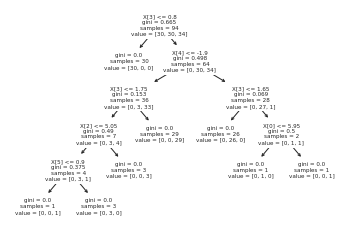

In [ ]:
#Sekarang coba buat model untuk menyelesaikan tugas kita
#Sesuai analisis kami, kami tidak dapat menemukan banyak informasi dari fitur baru yang dapat membantu dalam memecahkan masalah kami ...
#Untuk menyelesaikan tugas kami, saya telah memilih beberapa fitur di antara semuanya untuk membangun model terbaik kami..

'''Impor beberapa perpustakaan untuk membuat pengklasifikasi pohon keputusan dan memvisualisasikan struktur pohon'''

from sklearn import tree
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score


'''Di sini kita memisahkan variabel independen atau variabel target dari dataset Iris'''


X = nilai2[['SepalLengthCm', 'SepalWidthCm','PetalLengthCm', 'PetalWidthCm','Sepal_petal_wid_len_diff','Sepal_petal_width_diff']]
y = nilai2['Species']


#Sebelum melatih model, kami telah membagi data kami menjadi Kumpulan Data Latihan Aktual dan Kumpulan Data Uji Aktual untuk tujuan pelatihan dan validasi...

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.30, random_state=42)

#spliting data into validation train and validation test
Xt, Xcv, Yt, Ycv = train_test_split(Xtrain, Ytrain, test_size=0.10, random_state=42)


'''Sekarang kami telah membuat pengklasifikasi pohon keputusan dan melatihnya dengan dataset pelatihan.'''


Iris_clf = DecisionTreeClassifier(criterion='gini',min_samples_split=2)
Iris_clf.fit(Xt, Yt)

#Memvisualisasikan Pohon yang terbentuk pada dataset kereta

tree.plot_tree(Iris_clf)

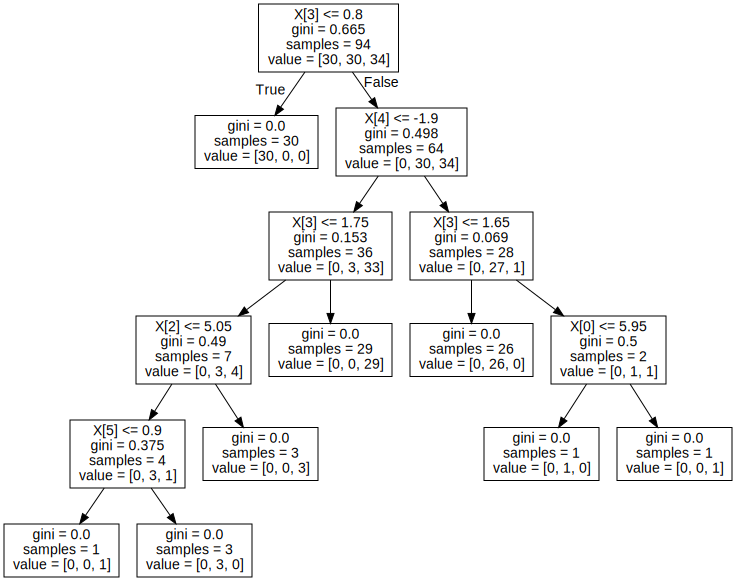

In [ ]:
#Memvisualisasikan Pohon Keputusan menggunakan pustaka graphviz

dot_data = tree.export_graphviz(Iris_clf, out_file=None)

graph = graphviz.Source(dot_data)
graph

In [ ]:
#Karena model kami telah dilatih....
#Sekarang kita dapat memvalidasi pohon keputusan kita menggunakan metode validasi silang untuk mendapatkan akurasi atau skor kinerja model kita.

print('Accuracy score is:',cross_val_score(Iris_clf, Xt, Yt, cv=3, scoring='accuracy').mean())

Accuracy score is: 0.9254032258064516


In [ ]:
#Memeriksa data uji validasi pada model terlatih kami dan mendapatkan metrik kinerja

from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

Y_hat = Iris_clf.predict(Xcv)


print('Accuracy score for validation test data is:',accuracy_score(Ycv, Y_hat))
multilabel_confusion_matrix(Ycv , Y_hat)

Accuracy score for validation test data is: 0.9090909090909091


array([[[10,  0],
        [ 0,  1]],

       [[ 4,  0],
        [ 1,  6]],

       [[ 7,  1],
        [ 0,  3]]])

In [ ]:
#Memeriksa kinerja model kami pada data uji aktual yang tidak terlihat..
YT_hat = Iris_clf.predict(Xtest)
YT_hat

print('Model Accuracy Score on totally unseen data(Xtest) is:',accuracy_score(Ytest, YT_hat)*100,'%')
multilabel_confusion_matrix(Ytest , YT_hat)

Model Accuracy Score on totally unseen data(Xtest) is: 97.77777777777777 %


array([[[26,  0],
        [ 0, 19]],

       [[32,  0],
        [ 1, 12]],

       [[31,  1],
        [ 0, 13]]])

[Text(0.4, 0.9375, 'X[2] <= 2.45\ngini = 0.664\nsamples = 105\nvalue = [31, 37, 37]'),
 Text(0.3, 0.8125, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.5, 0.8125, 'X[4] <= -1.9\ngini = 0.5\nsamples = 74\nvalue = [0, 37, 37]'),
 Text(0.3, 0.6875, 'X[3] <= 1.75\ngini = 0.18\nsamples = 40\nvalue = [0, 4, 36]'),
 Text(0.2, 0.5625, 'X[4] <= -2.6\ngini = 0.494\nsamples = 9\nvalue = [0, 4, 5]'),
 Text(0.1, 0.4375, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.3, 0.4375, 'X[0] <= 5.45\ngini = 0.444\nsamples = 6\nvalue = [0, 4, 2]'),
 Text(0.2, 0.3125, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.4, 0.3125, 'X[2] <= 5.05\ngini = 0.32\nsamples = 5\nvalue = [0, 4, 1]'),
 Text(0.3, 0.1875, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 Text(0.5, 0.1875, 'X[5] <= 1.2\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.4, 0.0625, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.6, 0.0625, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.4, 0.5625, 'gini 

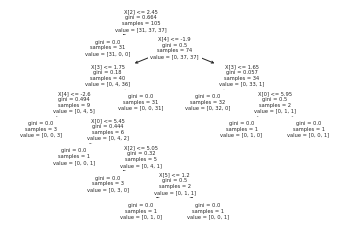

In [ ]:
'''Model pelatihan pada data kereta yang sebenarnya... '''
Iris_Fclf = DecisionTreeClassifier(criterion='gini',min_samples_split=2)
Iris_Fclf.fit(Xtrain, Ytrain)

#Visualisasikan struktur pohon..
tree.plot_tree(Iris_Fclf)

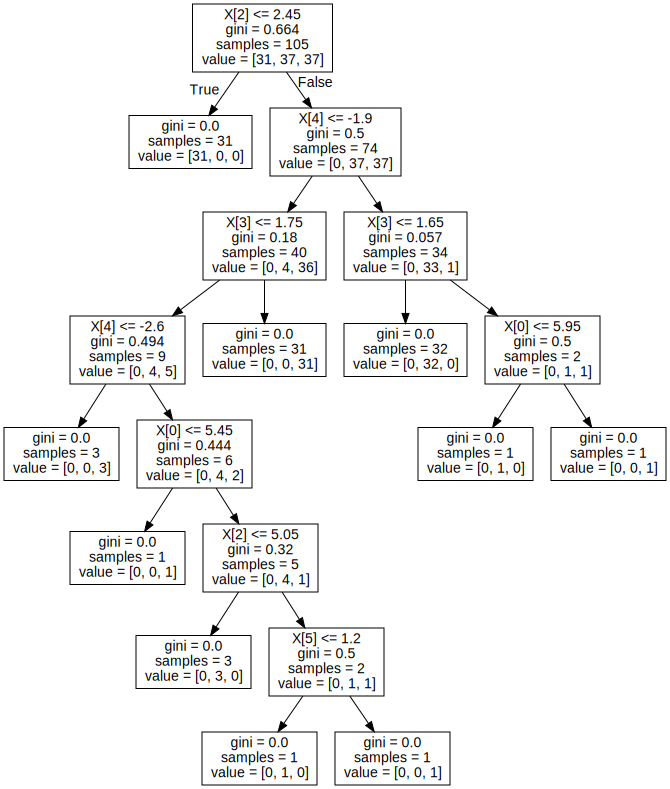

In [ ]:
#Pembuatan pohon keputusan akhir untuk diterapkan dalam kasus dunia nyata....

dot_data = tree.export_graphviz(Iris_Fclf, out_file=None)
graph = graphviz.Source(dot_data)
graph

In [ ]:
#Memeriksa performa model pada data Uji Aktual...

YT_Fhat = Iris_Fclf.predict(Xtest)
YT_Fhat

print('Model Accuracy Score on totally unseen data(Xtest) is:',accuracy_score(Ytest, YT_Fhat)*100,'%')
multilabel_confusion_matrix(Ytest , YT_Fhat)

Model Accuracy Score on totally unseen data(Xtest) is: 100.0 %


array([[[26,  0],
        [ 0, 19]],

       [[32,  0],
        [ 0, 13]],

       [[32,  0],
        [ 0, 13]]])

In [ ]:
#Pengujian untuk poin baru kecuali dari Dataset

Test_point = [[5.4,3.0,4.5,1.5,-1.5,1.5],
             [6.5,2.8,4.6,1.5,-1.8,1.3],
             [5.1,2.5,3.0,1.1,-0.5,1.4],
             [5.1,3.3,1.7,0.5,1.6,2.8],
             [6.0,2.7,5.1,1.6,-2.4,1.1],
             [6.0,2.2,5.0,1.5,-2.8,0.7]]

print(Iris_Fclf.predict(Test_point))

['Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica']


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


# UTS

In [2]:
dataUTS = pd.read_csv("https://raw.githubusercontent.com/ZuniAmandaDewi/dataset/main/dataR2.csv")

In [17]:
dataUTS

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2


##Naive Bayes

In [5]:
# Memisahkan dataset dalam variabel independen dan dependen
X = dataUTS.iloc[:,:4].values
y = dataUTS['Classification'].values

In [6]:
# Memisahkan dataset menjadi Training set dan Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 82)

In [8]:
# Fitur Scaling untuk membawa variabel dalam satu skala
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
# Memasang Klasifikasi Naive Bayes ke set Pelatihan dengan kernel linier
from sklearn.naive_bayes import GaussianNB
nvclassifier = GaussianNB()
nvclassifier.fit(X_train, y_train)

GaussianNB()

In [10]:
# Memprediksi hasil set Tes
y_pred = nvclassifier.predict(X_test)
print(y_pred)

[1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 2 2]


In [11]:
import numpy as np

In [12]:
# melihat nilai aktual dan prediksi berdampingan
y_compare = np.vstack((y_test,y_pred)).T
# nilai aktual di sisi kiri dan nilai prediksi di sisi kanan
# mencetak 5 nilai teratas
y_compare[:5,:]

array([[2, 1],
       [1, 1],
       [2, 1],
       [2, 1],
       [1, 1]])

In [13]:
# Membuat Matriks confusion
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[10  1]
 [ 9  4]]


In [14]:
# menemukan akurasi dari matriks confusion
a = cm.shape
corrPred = 0
falsePred = 0

for row in range(a[0]):
    for c in range(a[1]):
        if row == c:
            corrPred +=cm[row,c]
        else:
            falsePred += cm[row,c]
print('Correct predictions: ', corrPred)
print('False predictions', falsePred)
print ('\n\nAccuracy of the Naive Bayes Clasification is: ', corrPred/(cm.sum()))      

Correct predictions:  14
False predictions 10


Accuracy of the Naive Bayes Clasification is:  0.5833333333333334


##Decision Tree

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
#mengetahui jumlah data setiap  class
dataUTS.Classification.value_counts()

2    64
1    52
Name: Classification, dtype: int64

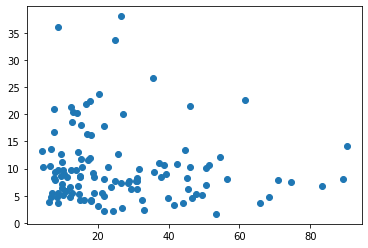

In [18]:
#Memvisualisasikan fitur kumpulan data untuk menemukan pola untuk menyelesaikan tugas

plt.scatter(dataUTS['Leptin'],dataUTS['Adiponectin'])
plt.show()

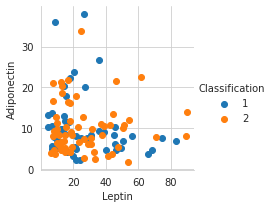

In [19]:
#Menggunakan Seaborn lib untuk memvisualisasikan 2 fitur berdasarkan variabel target.

sns.set_style('whitegrid')
sns.FacetGrid(dataUTS, hue = 'Classification') \
   .map(plt.scatter, 'Leptin','Adiponectin') \
   .add_legend()

plt.show()

In [21]:
dataUTS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


[Text(0.3804347826086957, 0.95, 'X[0] <= 7.306\ngini = 0.481\nsamples = 72\nvalue = [29, 43]'),
 Text(0.33695652173913043, 0.85, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.42391304347826086, 0.85, 'X[0] <= 15.017\ngini = 0.465\nsamples = 68\nvalue = [25, 43]'),
 Text(0.17391304347826086, 0.75, 'X[1] <= 9.757\ngini = 0.308\nsamples = 21\nvalue = [4, 17]'),
 Text(0.13043478260869565, 0.65, 'X[0] <= 7.933\ngini = 0.375\nsamples = 16\nvalue = [4, 12]'),
 Text(0.08695652173913043, 0.55, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.17391304347826086, 0.55, 'X[1] <= 9.552\ngini = 0.32\nsamples = 15\nvalue = [3, 12]'),
 Text(0.13043478260869565, 0.45, 'X[1] <= 5.454\ngini = 0.245\nsamples = 14\nvalue = [2, 12]'),
 Text(0.08695652173913043, 0.35, 'X[1] <= 4.919\ngini = 0.444\nsamples = 6\nvalue = [2, 4]'),
 Text(0.043478260869565216, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.13043478260869565, 0.25, 'X[0] <= 12.515\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 T

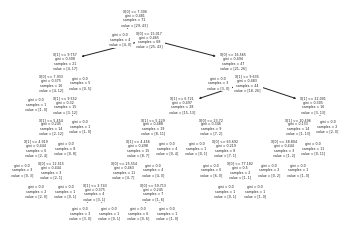

In [27]:
#Sekarang coba buat model untuk menyelesaikan tugas kita
#Sesuai analisis kami, kami tidak dapat menemukan banyak informasi dari fitur baru yang dapat membantu dalam memecahkan masalah kami ...
#Untuk menyelesaikan tugas kami, saya telah memilih beberapa fitur di antara semuanya untuk membangun model terbaik kami..

'''Impor beberapa perpustakaan untuk membuat pengklasifikasi pohon keputusan dan memvisualisasikan struktur pohon'''

from sklearn import tree
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score


'''Di sini kita memisahkan variabel independen atau variabel target dari dataset Iris'''


X = dataUTS[['Leptin', 'Adiponectin']]
y = dataUTS['Classification']


#Sebelum melatih model, kami telah membagi data kami menjadi Kumpulan Data Latihan Aktual dan Kumpulan Data Uji Aktual untuk tujuan pelatihan dan validasi...

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.30, random_state=42)

#spliting data into validation train and validation test
Xt, Xcv, Yt, Ycv = train_test_split(Xtrain, Ytrain, test_size=0.10, random_state=42)


'''Sekarang kami telah membuat pengklasifikasi pohon keputusan dan melatihnya dengan dataset pelatihan.'''


Iris_clf = DecisionTreeClassifier(criterion='gini',min_samples_split=2)
Iris_clf.fit(Xt, Yt)

#Memvisualisasikan Pohon yang terbentuk pada dataset kereta

tree.plot_tree(Iris_clf)

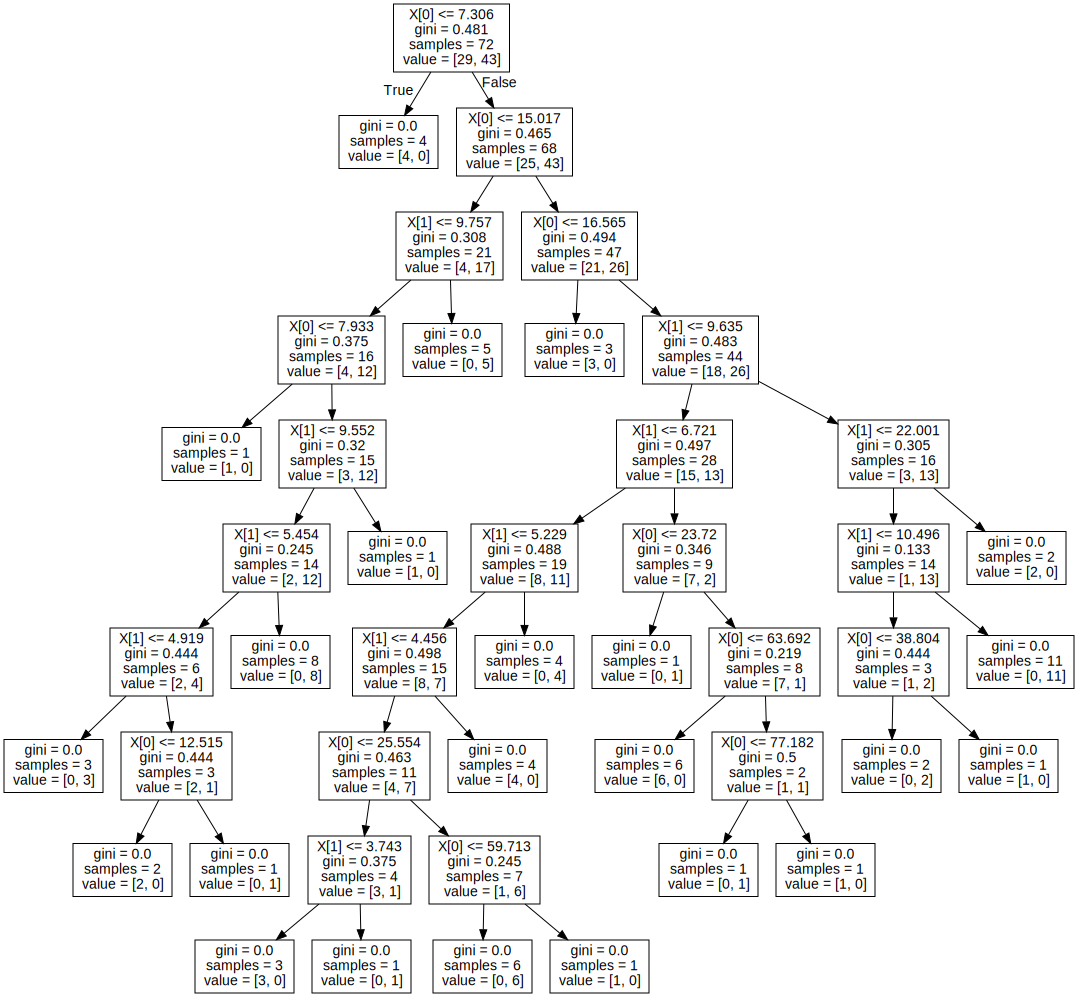

In [28]:
#Memvisualisasikan Pohon Keputusan menggunakan pustaka graphviz

dot_data = tree.export_graphviz(Iris_clf, out_file=None)

graph = graphviz.Source(dot_data)
graph

In [29]:
#Karena model kami telah dilatih....
#Sekarang kita dapat memvalidasi pohon keputusan kita menggunakan metode validasi silang untuk mendapatkan akurasi atau skor kinerja model kita.

print('Accuracy score is:',cross_val_score(Iris_clf, Xt, Yt, cv=3, scoring='accuracy').mean())

Accuracy score is: 0.47222222222222227


In [30]:
#Memeriksa data uji validasi pada model terlatih kami dan mendapatkan metrik kinerja

from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

Y_hat = Iris_clf.predict(Xcv)


print('Accuracy score for validation test data is:',accuracy_score(Ycv, Y_hat))
multilabel_confusion_matrix(Ycv , Y_hat)

Accuracy score for validation test data is: 0.3333333333333333


array([[[1, 2],
        [4, 2]],

       [[2, 4],
        [2, 1]]])

In [31]:
#Memeriksa kinerja model kami pada data uji aktual yang tidak terlihat..
YT_hat = Iris_clf.predict(Xtest)
YT_hat

print('Model Accuracy Score on totally unseen data(Xtest) is:',accuracy_score(Ytest, YT_hat)*100,'%')
multilabel_confusion_matrix(Ytest , YT_hat)

Model Accuracy Score on totally unseen data(Xtest) is: 57.14285714285714 %


array([[[10,  8],
        [ 7, 10]],

       [[10,  7],
        [ 8, 10]]])

[Text(0.54, 0.95, 'X[0] <= 7.306\ngini = 0.491\nsamples = 81\nvalue = [35, 46]'),
 Text(0.5, 0.85, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.58, 0.85, 'X[1] <= 9.757\ngini = 0.481\nsamples = 77\nvalue = [31, 46]'),
 Text(0.32, 0.75, 'X[1] <= 6.79\ngini = 0.5\nsamples = 49\nvalue = [24, 25]'),
 Text(0.2, 0.65, 'X[1] <= 5.454\ngini = 0.452\nsamples = 29\nvalue = [10, 19]'),
 Text(0.16, 0.55, 'X[1] <= 4.783\ngini = 0.496\nsamples = 22\nvalue = [10, 12]'),
 Text(0.08, 0.45, 'X[0] <= 19.045\ngini = 0.444\nsamples = 15\nvalue = [5, 10]'),
 Text(0.04, 0.35, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.12, 0.35, 'X[0] <= 25.554\ngini = 0.496\nsamples = 11\nvalue = [5, 6]'),
 Text(0.08, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.16, 0.25, 'X[1] <= 3.726\ngini = 0.375\nsamples = 8\nvalue = [2, 6]'),
 Text(0.12, 0.15, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.2, 0.15, 'X[0] <= 36.28\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.16, 0.05, 'gini = 0

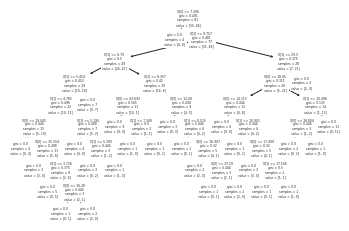

In [32]:
'''Model pelatihan pada data kereta yang sebenarnya... '''
Iris_Fclf = DecisionTreeClassifier(criterion='gini',min_samples_split=2)
Iris_Fclf.fit(Xtrain, Ytrain)

#Visualisasikan struktur pohon..
tree.plot_tree(Iris_Fclf)

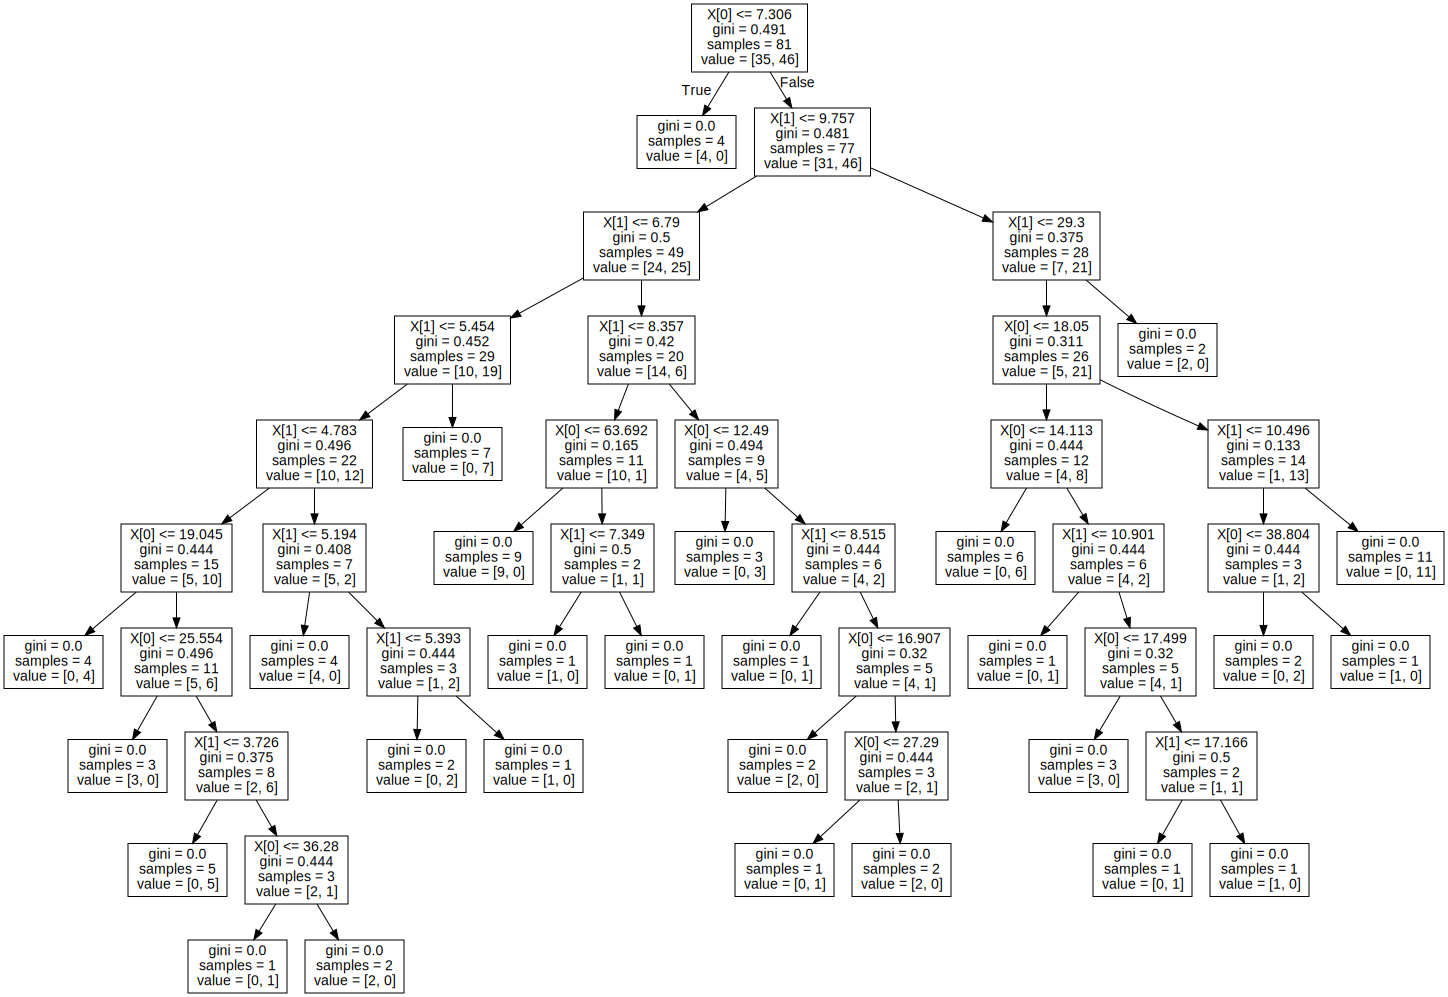

In [33]:
#Pembuatan pohon keputusan akhir untuk diterapkan dalam kasus dunia nyata....

dot_data = tree.export_graphviz(Iris_Fclf, out_file=None)
graph = graphviz.Source(dot_data)
graph

In [34]:
#Memeriksa performa model pada data Uji Aktual...

YT_Fhat = Iris_Fclf.predict(Xtest)
YT_Fhat

print('Model Accuracy Score on totally unseen data(Xtest) is:',accuracy_score(Ytest, YT_Fhat)*100,'%')
multilabel_confusion_matrix(Ytest , YT_Fhat)

Model Accuracy Score on totally unseen data(Xtest) is: 42.857142857142854 %


array([[[ 9,  9],
        [11,  6]],

       [[ 6, 11],
        [ 9,  9]]])

In [37]:
#Pengujian untuk poin baru kecuali dari Dataset

Test_point = [[10.4,3.0],
             [6.5,2.8],
             [5.1,2.5],
             [5.1,3.3],
             [6.0,2.7],
             [6.0,2.2]]

print(Iris_Fclf.predict(Test_point))

[2 1 1 1 1 1]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
